# CSC3831 - Coursework Part 2
This part of the coursework uses the same dataset as used in the first part of the coursework. In this part of the coursework you are going to develop four machine learning models for predicting the 'median_house_value' from the dataset. The focus here is on comparing the different models and looking at how you can improve them. There is no need to use a cleaned up version of the data from the first part of the coursework. But you can if you wish.

# Machine Learning: House price prediction

You are asked to build four machine learning prediction models for predicting the mean house price from the other features provided in the dataset.

## Read in the data

In [ ]:
import pandas as pd
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)
houses.columns

Index(['median_house_value', 'median_income', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude',
       'longitude'],
      dtype='object')

In [ ]:
houses

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,452600.0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23
1,358500.0,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22
2,352100.0,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24
3,341300.0,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25
4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25.0,1665.0,374.0,845.0,330.0,39.48,-121.09
20636,77100.0,2.5568,18.0,697.0,150.0,356.0,114.0,39.49,-121.21
20637,92300.0,1.7000,17.0,2254.0,485.0,1007.0,433.0,39.43,-121.22
20638,84700.0,1.8672,18.0,1860.0,409.0,741.0,349.0,39.43,-121.32


# Data Preparation

To ensure the quality of the data is to a high standard, I will do the follwoing:

* Normalise the data
* Check for missing or null values
* Identify any outliers

All of these steps will improve the accuracy of the models I make later on due to having data of higher quality.

### Normalise the data to add greater information about each record

In [ ]:
# rooms per household
houses['rooms_per_household'] = houses['total_rooms'] / houses['households']
# shift column 'rooms per household' to position after total_rooms
move_column = houses.pop('rooms_per_household')
houses.insert(4, 'rooms_per_household', move_column)

# bedrooms per household
houses['bedrooms_per_household'] = houses['total_bedrooms'] / houses['households']
# shift column 'bedrooms per household' to position after total_bedrooms
move_column = houses.pop('bedrooms_per_household')
houses.insert(6, 'bedrooms_per_household', move_column)

# people per household
houses['people_per_household'] = houses['population'] / houses['households']
# shift column 'people per household' to position after population
move_column = houses.pop('people_per_household')
houses.insert(8, 'people_per_household', move_column)

# value of house per bedroom
houses['value_of_house_per_bedroom'] = houses['median_house_value'] / houses['bedrooms_per_household']
# shift column 'value of house per bedroom' to position after median_house_value
move_column = houses.pop('value_of_house_per_bedroom')
houses.insert(1, 'value_of_house_per_bedroom', move_column)

houses

,median_house_value,value_of_house_per_bedroom,median_income,housing_median_age,total_rooms,rooms_per_household,total_bedrooms,bedrooms_per_household,population,people_per_household,households,latitude,longitude
0,452600.0,442074.418605,8.3252,41.0,880.0,6.984127,129.0,1.023810,322.0,2.555556,126.0,37.88,-122.23
1,358500.0,368872.513562,8.3014,21.0,7099.0,6.238137,1106.0,0.971880,2401.0,2.109842,1138.0,37.86,-122.22
2,352100.0,328008.947368,7.2574,52.0,1467.0,8.288136,190.0,1.073446,496.0,2.802260,177.0,37.85,-122.24
3,341300.0,318062.553191,5.6431,52.0,1274.0,5.817352,235.0,1.073059,558.0,2.547945,219.0,37.85,-122.25
4,342200.0,316535.000000,3.8462,52.0,1627.0,6.281853,280.0,1.081081,565.0,2.181467,259.0,37.85,-122.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,68911.764706,1.5603,25.0,1665.0,5.045455,374.0,1.133333,845.0,2.560606,330.0,39.48,-121.09
20636,77100.0,58596.000000,2.5568,18.0,697.0,6.114035,150.0,1.315789,356.0,3.122807,114.0,39.49,-121.21
20637,92300.0,82403.917526,1.7000,17.0,2254.0,5.205543,485.0,1.120092,1007.0,2.325635,433.0,39.43,-121.22
20638,84700.0,72274.572127,1.8672,18.0,1860.0,5.329513,409.0,1.171920,741.0,2.123209,349.0,39.43,-121.32


Now we have normalised data, we can directly and fairly compare regions.

Let's now check for null or missing values within the dataste.

### Check for null or missing values

In [ ]:
houses.isnull().sum()

median_house_value            0
value_of_house_per_bedroom    0
median_income                 0
housing_median_age            0
total_rooms                   0
rooms_per_household           0
total_bedrooms                0
bedrooms_per_household        0
population                    0
people_per_household          0
households                    0
latitude                      0
longitude                     0
dtype: int64

There are no null or missing values in this dataset.

Let's see how the data is distributed for each feature.

### Plot the distribution of the normalised data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import ceil
import seaborn as sns

##
## use this utility to produce boxplots and density plots for the features in your dataset
## type= {boxplot, kdeplot, histogram}
##
def plot_distributions(data, columns, type='boxplot', title=None):

    print("plotting columns {c}".format(c=list(columns)))
    
    if type not in {'boxplot', 'dkeplot', 'histplot'}:
        print("only type= {boxplot, dkeplot, histplot} are supported")
        return

    ## grid size depends on number of columns
    ## max 4 columns in the grid
    maxCols  = 4
    
    if len(columns) <4:
        numCols = len(columns)
    else:
        numCols = maxCols
    numRows = ceil(len(columns) / 4)
    
#     print(len(columns))
#     print('{r}x{c} subplots'.format(r=numRows, c=numCols))

    fig, axs = plt.subplots(numRows, numCols)
    fig.suptitle(title)
    fig.set_figwidth(5*numCols)
    fig.set_figheight(3*numCols)
    fig.tight_layout(pad=5.0)

    i=j=0
    
    for c in columns:
        if type == 'boxplot':
            sns.boxplot(data=data, x=c, ax=axs[i,j], color= '#51a691')
        elif type == 'histplot':
            sns.histplot(data=data, x=c, ax=axs[i,j], color= '#51a691')
        else:
            sns.kdeplot(data=data, x=c, ax=axs[i,j], color= '#51a691')

        axs[i,j].set_title(c, color='#51a691')
        j = j+1
        if j == 4:
            i = i+1
            j= 0
    plt.tight_layout()
    plt.show()

plotting columns ['median_house_value', 'value_of_house_per_bedroom', 'median_income', 'housing_median_age', 'total_rooms', 'rooms_per_household', 'total_bedrooms', 'bedrooms_per_household', 'population', 'people_per_household', 'households', 'latitude', 'longitude']


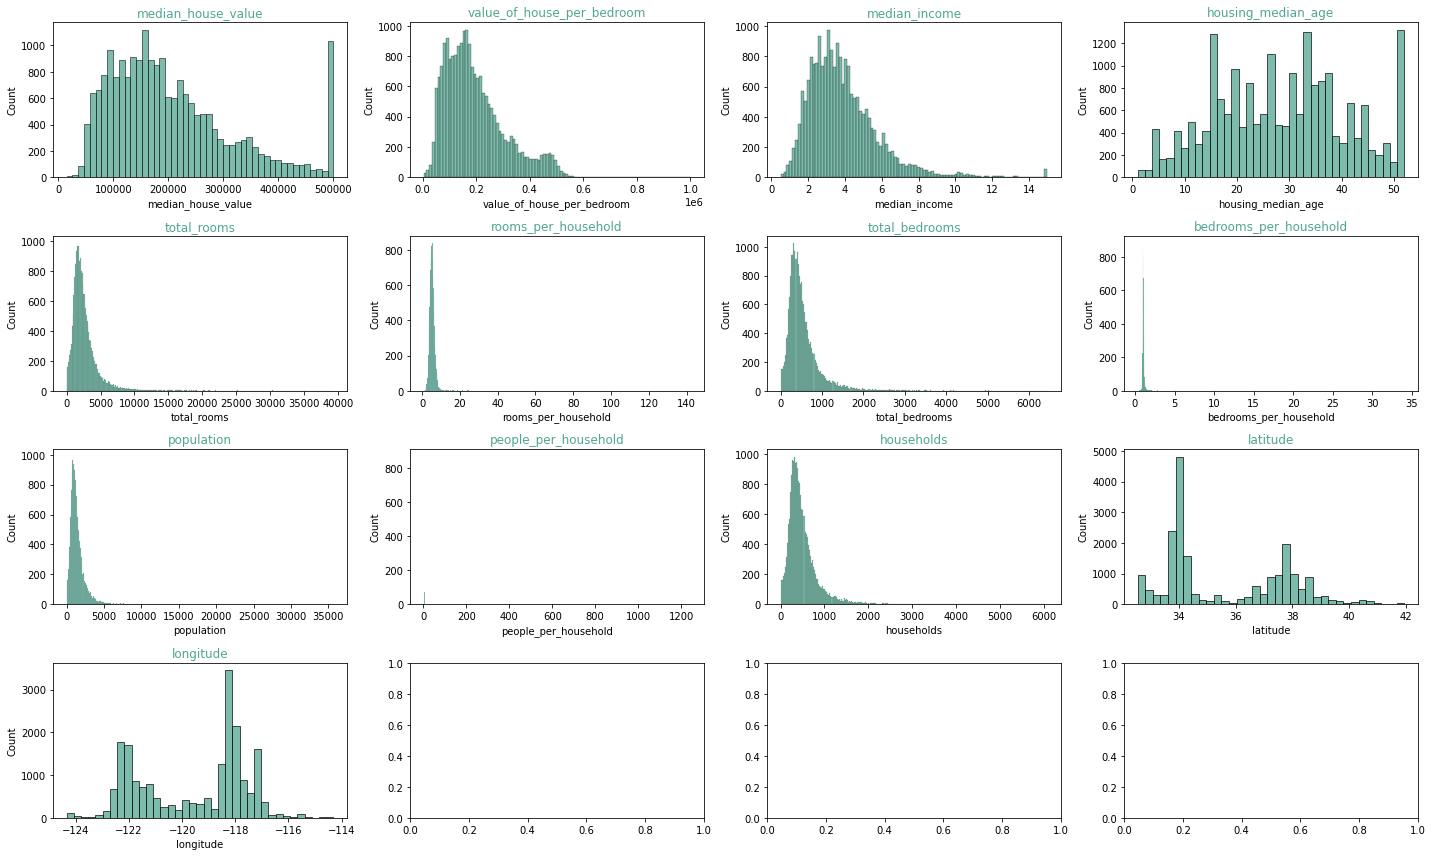

In [ ]:
plot_distributions(houses, houses.columns, type='histplot')

plotting columns ['median_house_value', 'value_of_house_per_bedroom', 'median_income', 'housing_median_age', 'total_rooms', 'rooms_per_household', 'total_bedrooms', 'bedrooms_per_household', 'population', 'people_per_household', 'households', 'latitude', 'longitude']


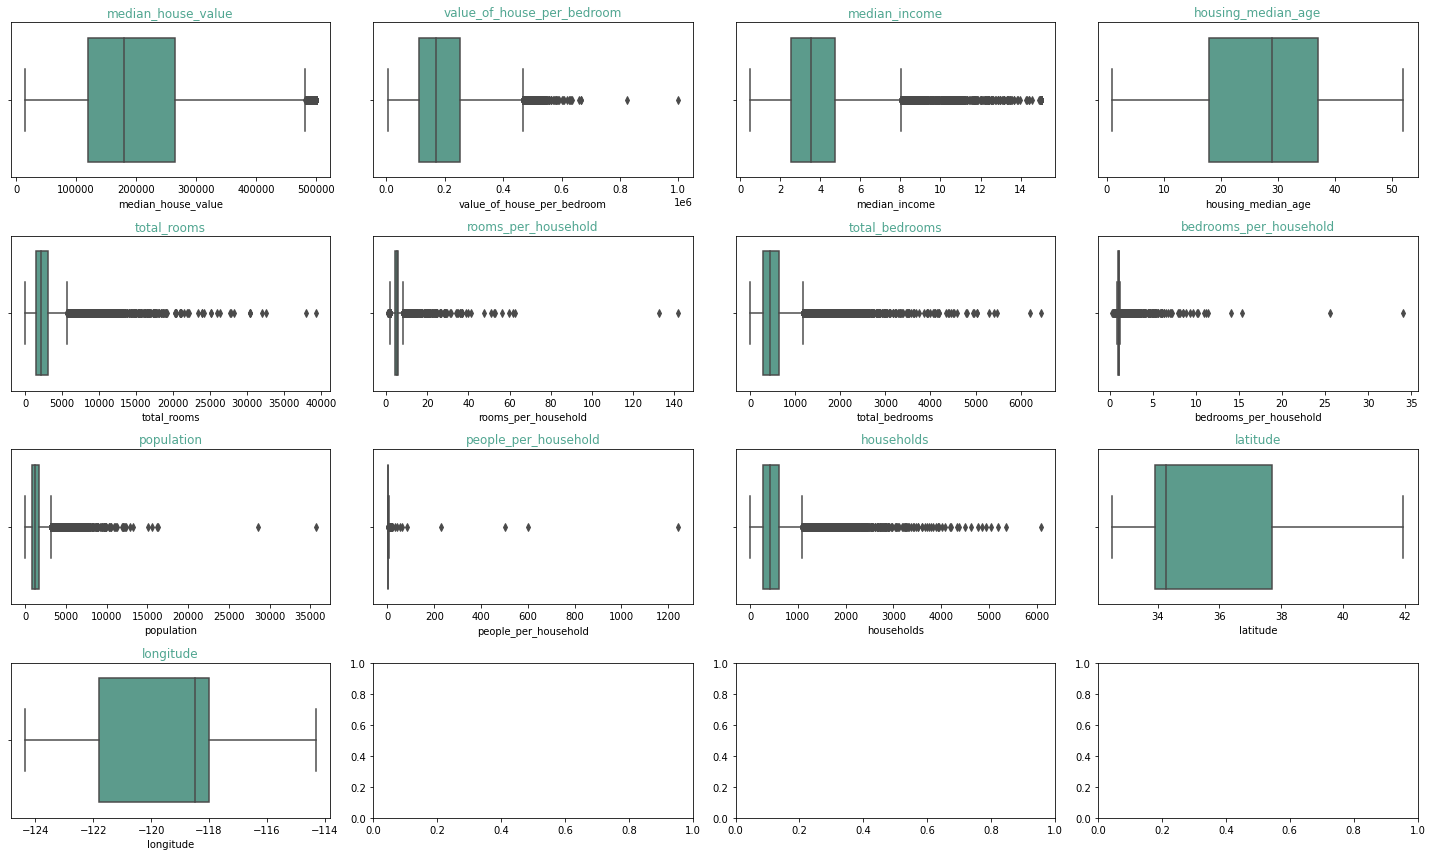

In [ ]:
plot_distributions(houses, houses.columns, type='boxplot')

From the plots above it is clear that outliers are present in this dataset due to the vast whitespaces in the histograms and the distant points that stem well beyond the 'maximum' value in the boxplots.

### Check for outliers

To do this, I will first manually search for and remove obvious outliers by removing records from the dataset which do not make sense in the real world such as more bedrooms than rooms for example. After this, I will then run KNN Anomaly Detection over the remaining records so to identify more subtle outliers.

Manually identify obvious outliers in the data

In [ ]:
houses_outlier_identification = houses.copy()
houses_outlier_identification = houses_outlier_identification.loc[(houses_outlier_identification['households'] > houses_outlier_identification['total_rooms']) |
                                        (houses_outlier_identification['bedrooms_per_household'] < 0.9) | 
                                        (houses_outlier_identification['rooms_per_household'] < 1) |
                                        (houses_outlier_identification['total_bedrooms'] > houses_outlier_identification['total_rooms']) |
                                        (houses_outlier_identification['rooms_per_household'] > 14 ) |
                                        (houses_outlier_identification['bedrooms_per_household'] > 8) | 
                                        (houses_outlier_identification['median_house_value'] < 20000) | 
                                        (houses_outlier_identification['value_of_house_per_bedroom'] < 20000) |
                                        (houses_outlier_identification['people_per_household'] > 8)]
houses_outlier_identification

,median_house_value,value_of_house_per_bedroom,median_income,housing_median_age,total_rooms,rooms_per_household,total_bedrooms,bedrooms_per_household,population,people_per_household,households,latitude,longitude
59,60000.0,79534.883721,2.5625,2.0,158.0,2.771930,43.0,0.754386,94.0,1.649123,57.0,37.82,-122.29
73,67500.0,118125.000000,0.4999,46.0,12.0,1.714286,4.0,0.571429,18.0,2.571429,7.0,37.81,-122.29
91,137500.0,139080.459770,0.8668,52.0,215.0,2.443182,87.0,0.988636,904.0,10.272727,88.0,37.80,-122.28
140,483300.0,661357.894737,6.3624,30.0,292.0,5.615385,38.0,0.730769,126.0,2.423077,52.0,37.81,-122.18
192,75000.0,95930.232558,2.1000,51.0,175.0,3.181818,43.0,0.781818,228.0,4.145455,55.0,37.79,-122.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20501,335000.0,374411.764706,6.5483,20.0,1586.0,7.588517,187.0,0.894737,699.0,3.344498,209.0,34.30,-118.71
20522,73100.0,81571.854305,3.0536,36.0,1672.0,4.961424,302.0,0.896142,969.0,2.875371,337.0,38.54,-121.54
20527,310000.0,304561.403509,1.4653,7.0,1777.0,3.525794,513.0,1.017857,4479.0,8.886905,504.0,38.54,-121.79
20583,137500.0,156081.081081,3.8750,31.0,371.0,4.416667,74.0,0.880952,208.0,2.476190,84.0,38.73,-122.00


In [ ]:
houses_cleaned = houses.copy()
houses_cleaned.drop(houses_outlier_identification.index, inplace=True)

KNN Outlier Detection

In [ ]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=20)
nbrs.fit(houses_cleaned)

NearestNeighbors(n_neighbors=20)

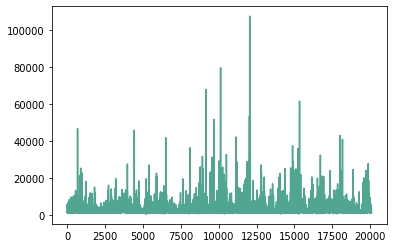

In [ ]:
distances, indexes = nbrs.kneighbors(houses_cleaned)
plt.plot(distances.mean(axis=1), color= '#51a691')

In [ ]:
knn_outlier_index = np.where(distances.mean(axis=1) > 7000)
knn_outlier_values = houses_cleaned.iloc[knn_outlier_index]
knn_outlier_values

,median_house_value,value_of_house_per_bedroom,median_income,housing_median_age,total_rooms,rooms_per_household,total_bedrooms,bedrooms_per_household,population,people_per_household,households,latitude,longitude
155,410300.0,362525.342466,8.8793,52.0,2315.0,8.972868,292.0,1.131783,861.0,3.337209,258.0,37.81,-122.23
283,371000.0,356326.660156,5.9849,22.0,12842.0,6.528724,2048.0,1.041179,4985.0,2.534316,1967.0,37.79,-122.16
417,371300.0,401225.671642,7.8336,37.0,2220.0,6.132597,335.0,0.925414,903.0,2.494475,362.0,37.90,-122.26
456,384600.0,335502.127660,5.2289,41.0,685.0,5.569106,141.0,1.146341,266.0,2.162602,123.0,37.87,-122.25
489,489600.0,434673.887814,3.0417,48.0,2153.0,4.690632,517.0,1.126362,1656.0,3.607843,459.0,37.86,-122.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,425800.0,386048.473968,8.7288,6.0,8803.0,8.715842,1114.0,1.102970,3385.0,3.351485,1010.0,34.23,-118.83
20440,308100.0,277543.525336,6.4963,6.0,16222.0,7.799038,2309.0,1.110096,6700.0,3.221154,2080.0,34.24,-118.77
20447,375000.0,399193.548387,3.1250,23.0,366.0,5.545455,62.0,0.939394,265.0,4.015152,66.0,34.33,-118.89
20451,321300.0,317376.143141,6.9712,5.0,25187.0,7.241806,3521.0,1.012363,11956.0,3.437608,3478.0,34.26,-118.90


In [ ]:
houses_cleaned.drop(knn_outlier_values.index, inplace=True)

In [ ]:
houses_cleaned

,median_house_value,value_of_house_per_bedroom,median_income,housing_median_age,total_rooms,rooms_per_household,total_bedrooms,bedrooms_per_household,population,people_per_household,households,latitude,longitude
0,452600.0,442074.418605,8.3252,41.0,880.0,6.984127,129.0,1.023810,322.0,2.555556,126.0,37.88,-122.23
1,358500.0,368872.513562,8.3014,21.0,7099.0,6.238137,1106.0,0.971880,2401.0,2.109842,1138.0,37.86,-122.22
2,352100.0,328008.947368,7.2574,52.0,1467.0,8.288136,190.0,1.073446,496.0,2.802260,177.0,37.85,-122.24
3,341300.0,318062.553191,5.6431,52.0,1274.0,5.817352,235.0,1.073059,558.0,2.547945,219.0,37.85,-122.25
4,342200.0,316535.000000,3.8462,52.0,1627.0,6.281853,280.0,1.081081,565.0,2.181467,259.0,37.85,-122.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,68911.764706,1.5603,25.0,1665.0,5.045455,374.0,1.133333,845.0,2.560606,330.0,39.48,-121.09
20636,77100.0,58596.000000,2.5568,18.0,697.0,6.114035,150.0,1.315789,356.0,3.122807,114.0,39.49,-121.21
20637,92300.0,82403.917526,1.7000,17.0,2254.0,5.205543,485.0,1.120092,1007.0,2.325635,433.0,39.43,-121.22
20638,84700.0,72274.572127,1.8672,18.0,1860.0,5.329513,409.0,1.171920,741.0,2.123209,349.0,39.43,-121.32


### Plot the distribution of the cleaned data

plotting columns ['median_house_value', 'value_of_house_per_bedroom', 'median_income', 'housing_median_age', 'total_rooms', 'rooms_per_household', 'total_bedrooms', 'bedrooms_per_household', 'population', 'people_per_household', 'households', 'latitude', 'longitude']


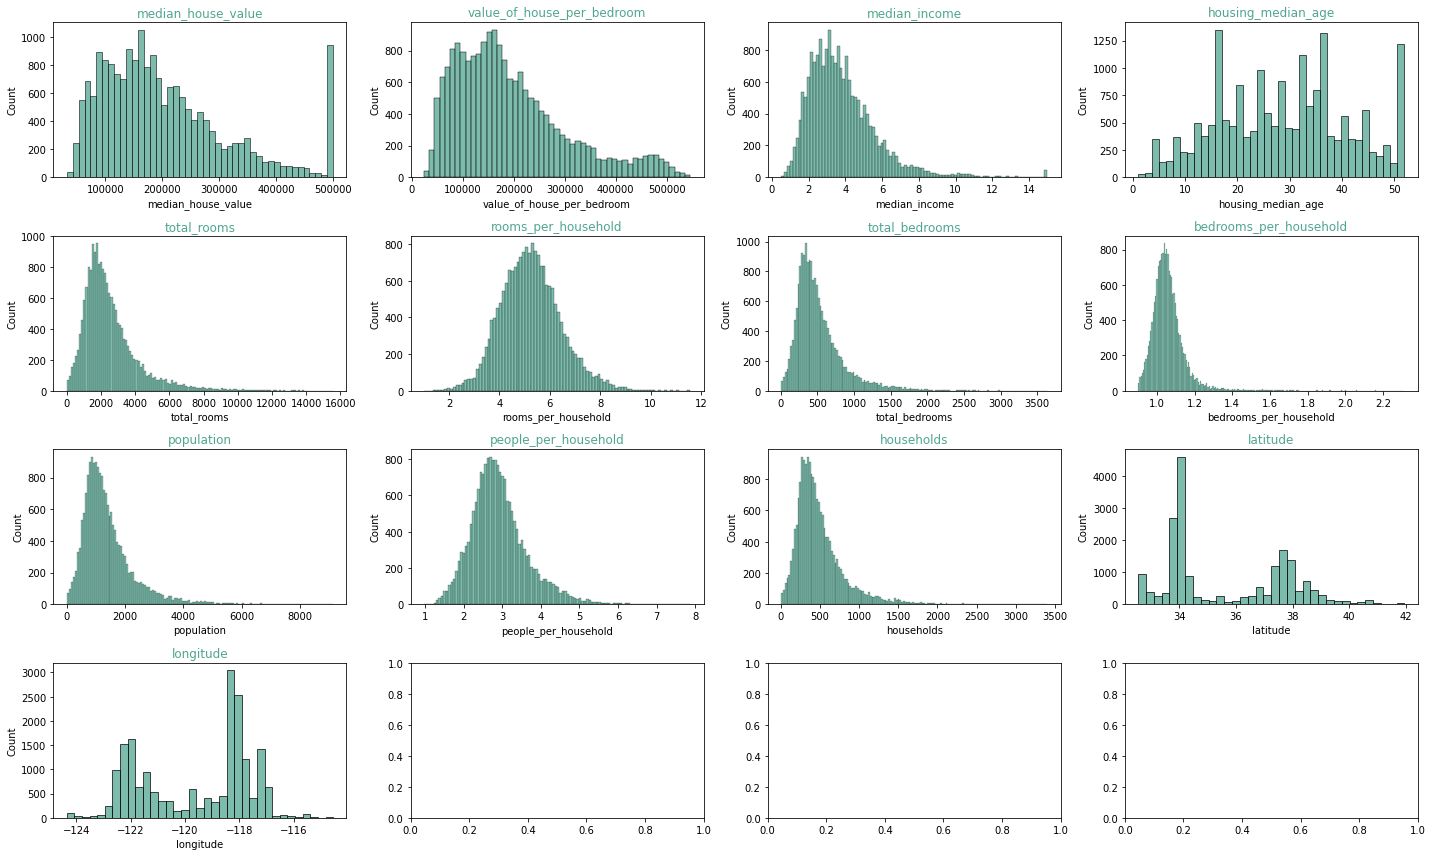

In [ ]:
plot_distributions(houses_cleaned, houses_cleaned.columns, type='histplot')

plotting columns ['median_house_value', 'value_of_house_per_bedroom', 'median_income', 'housing_median_age', 'total_rooms', 'rooms_per_household', 'total_bedrooms', 'bedrooms_per_household', 'population', 'people_per_household', 'households', 'latitude', 'longitude']


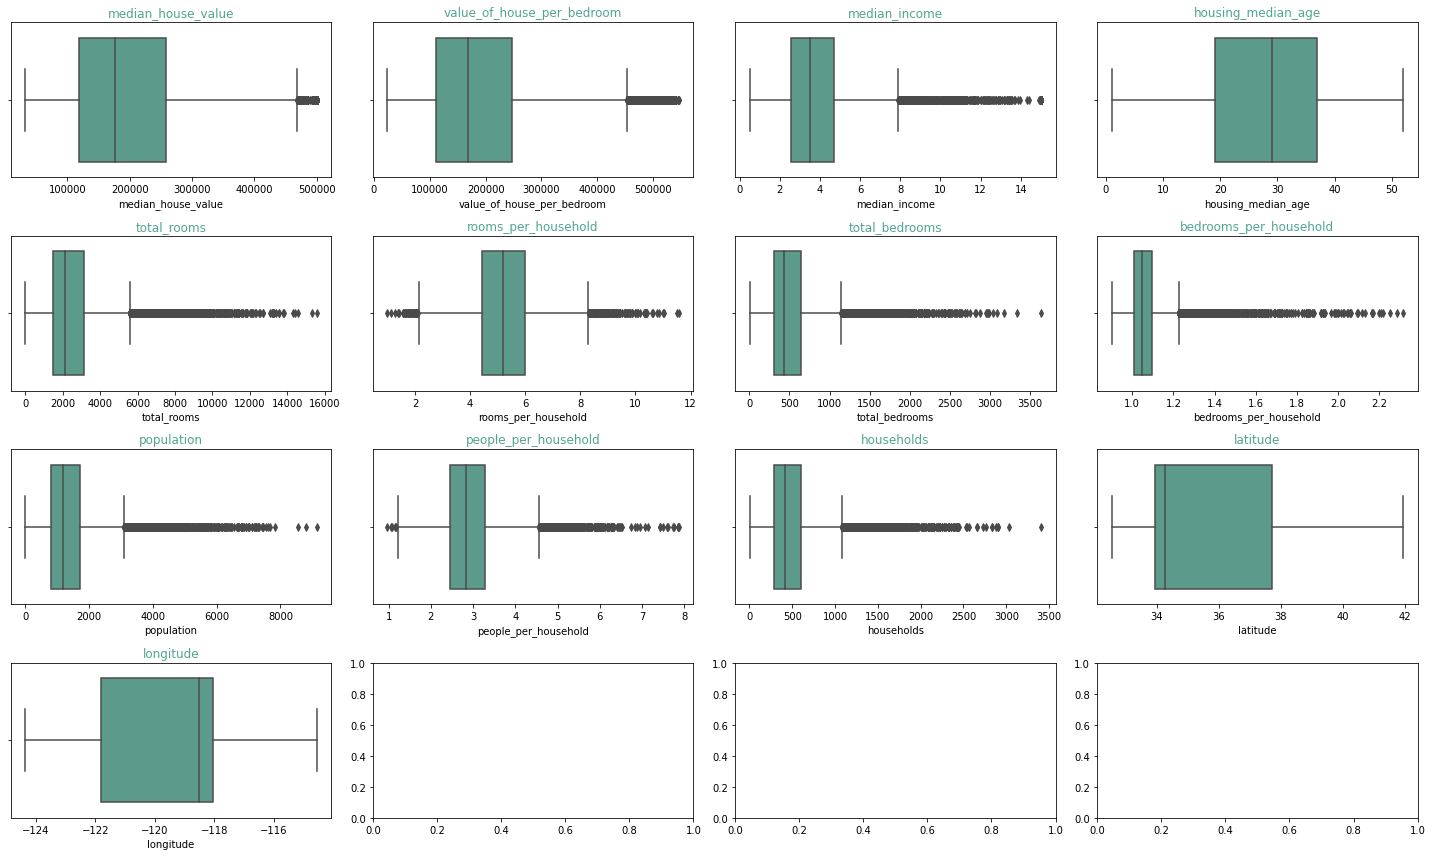

In [ ]:
plot_distributions(houses_cleaned, houses_cleaned.columns, type='boxplot')

### Compare the data before and after cleaning

I will now compare the distribution of data before and after cleaning the data.

To do so, I will plot:
* a histogram for each feature
* a violinplot for each feature

This will allow me to see whether I have effected the shape/trend of the data and whether I have changed the general distribution of the data.

In [ ]:
houses_cleaned

,median_house_value,value_of_house_per_bedroom,median_income,housing_median_age,total_rooms,rooms_per_household,total_bedrooms,bedrooms_per_household,population,people_per_household,households,latitude,longitude
0,452600.0,442074.418605,8.3252,41.0,880.0,6.984127,129.0,1.023810,322.0,2.555556,126.0,37.88,-122.23
1,358500.0,368872.513562,8.3014,21.0,7099.0,6.238137,1106.0,0.971880,2401.0,2.109842,1138.0,37.86,-122.22
2,352100.0,328008.947368,7.2574,52.0,1467.0,8.288136,190.0,1.073446,496.0,2.802260,177.0,37.85,-122.24
3,341300.0,318062.553191,5.6431,52.0,1274.0,5.817352,235.0,1.073059,558.0,2.547945,219.0,37.85,-122.25
4,342200.0,316535.000000,3.8462,52.0,1627.0,6.281853,280.0,1.081081,565.0,2.181467,259.0,37.85,-122.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,68911.764706,1.5603,25.0,1665.0,5.045455,374.0,1.133333,845.0,2.560606,330.0,39.48,-121.09
20636,77100.0,58596.000000,2.5568,18.0,697.0,6.114035,150.0,1.315789,356.0,3.122807,114.0,39.49,-121.21
20637,92300.0,82403.917526,1.7000,17.0,2254.0,5.205543,485.0,1.120092,1007.0,2.325635,433.0,39.43,-121.22
20638,84700.0,72274.572127,1.8672,18.0,1860.0,5.329513,409.0,1.171920,741.0,2.123209,349.0,39.43,-121.32


In [ ]:
# Create a dataframe which merges the original dirty data with the cleaned data
# Add a column called 'State of data' and label the dirty data as 'dirty' and the 
# clean data as 'clean'. By doing this, I can illustrate the histograms and 
# violinplots below.

# Creating a DataFrame
df_dirty =  houses.copy()
dirty_value = 'Dirty'
# Adding a new column with same values
df_dirty.insert(len(df_dirty.columns),'State of data',dirty_value)

# Creating a DataFrame
df_clean =  houses_cleaned.copy()
clean_value = 'Cleaned'
# Adding a new column with same values
df_clean.insert(len(df_clean.columns),'State of data',clean_value)

compare = pd.merge(df_dirty, df_clean, how="outer", indicator=False)
compare

,median_house_value,value_of_house_per_bedroom,median_income,housing_median_age,total_rooms,rooms_per_household,total_bedrooms,bedrooms_per_household,population,people_per_household,households,latitude,longitude,State of data
0,452600.0,442074.418605,8.3252,41.0,880.0,6.984127,129.0,1.023810,322.0,2.555556,126.0,37.88,-122.23,Dirty
1,358500.0,368872.513562,8.3014,21.0,7099.0,6.238137,1106.0,0.971880,2401.0,2.109842,1138.0,37.86,-122.22,Dirty
2,352100.0,328008.947368,7.2574,52.0,1467.0,8.288136,190.0,1.073446,496.0,2.802260,177.0,37.85,-122.24,Dirty
3,341300.0,318062.553191,5.6431,52.0,1274.0,5.817352,235.0,1.073059,558.0,2.547945,219.0,37.85,-122.25,Dirty
4,342200.0,316535.000000,3.8462,52.0,1627.0,6.281853,280.0,1.081081,565.0,2.181467,259.0,37.85,-122.25,Dirty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39860,78100.0,68911.764706,1.5603,25.0,1665.0,5.045455,374.0,1.133333,845.0,2.560606,330.0,39.48,-121.09,Cleaned
39861,77100.0,58596.000000,2.5568,18.0,697.0,6.114035,150.0,1.315789,356.0,3.122807,114.0,39.49,-121.21,Cleaned
39862,92300.0,82403.917526,1.7000,17.0,2254.0,5.205543,485.0,1.120092,1007.0,2.325635,433.0,39.43,-121.22,Cleaned
39863,84700.0,72274.572127,1.8672,18.0,1860.0,5.329513,409.0,1.171920,741.0,2.123209,349.0,39.43,-121.32,Cleaned


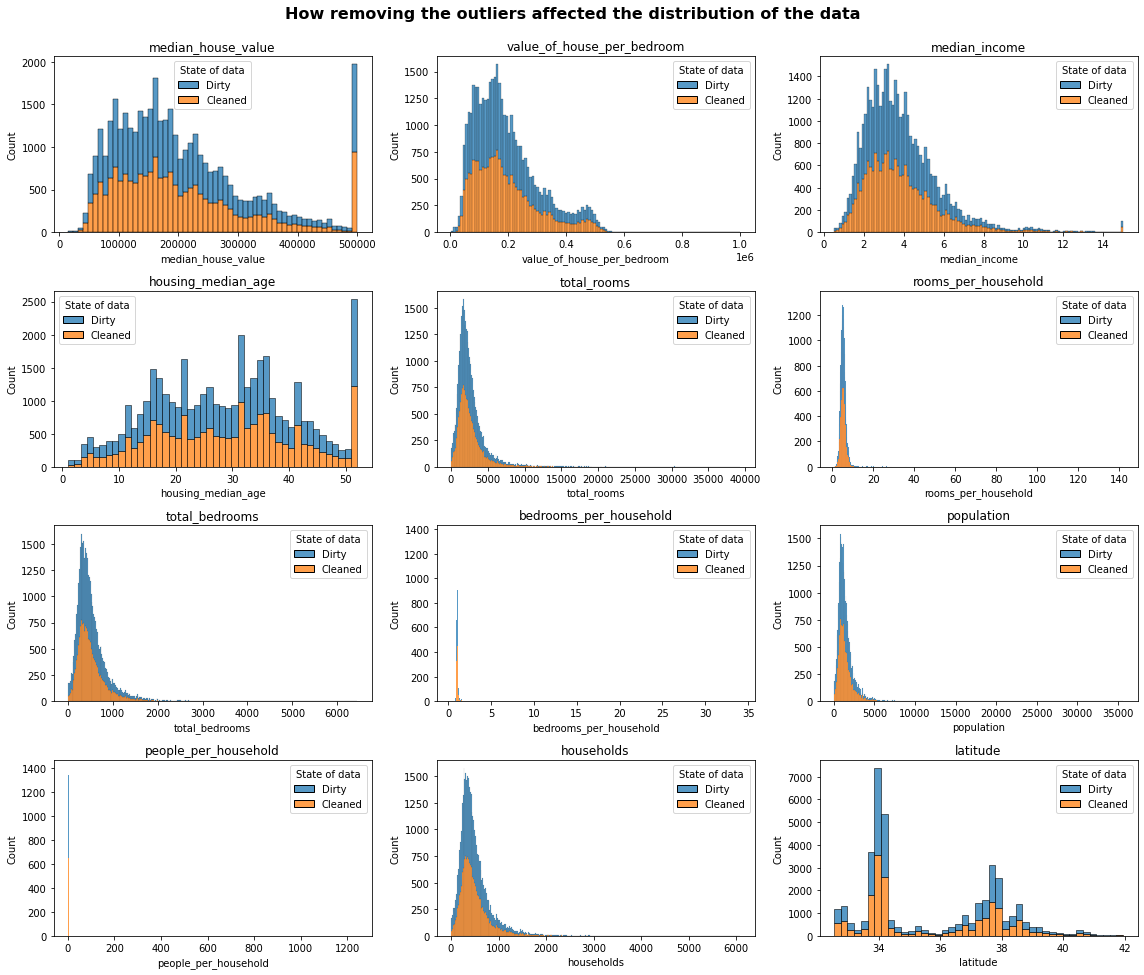

In [ ]:
import seaborn as sns

index = 1
fig = plt.figure(figsize = (16,16))
fig.suptitle('How removing the outliers affected the distribution of the data', fontsize=16, fontweight='bold', y=1.02)

for i in houses.columns[:len(houses.columns)-1]:
  plt.subplot(5,3, index)
  sns.histplot(data=compare, x=compare[i], hue='State of data', multiple="stack")
  plt.title(i)
  index = index + 1
plt.tight_layout()
plt.show()

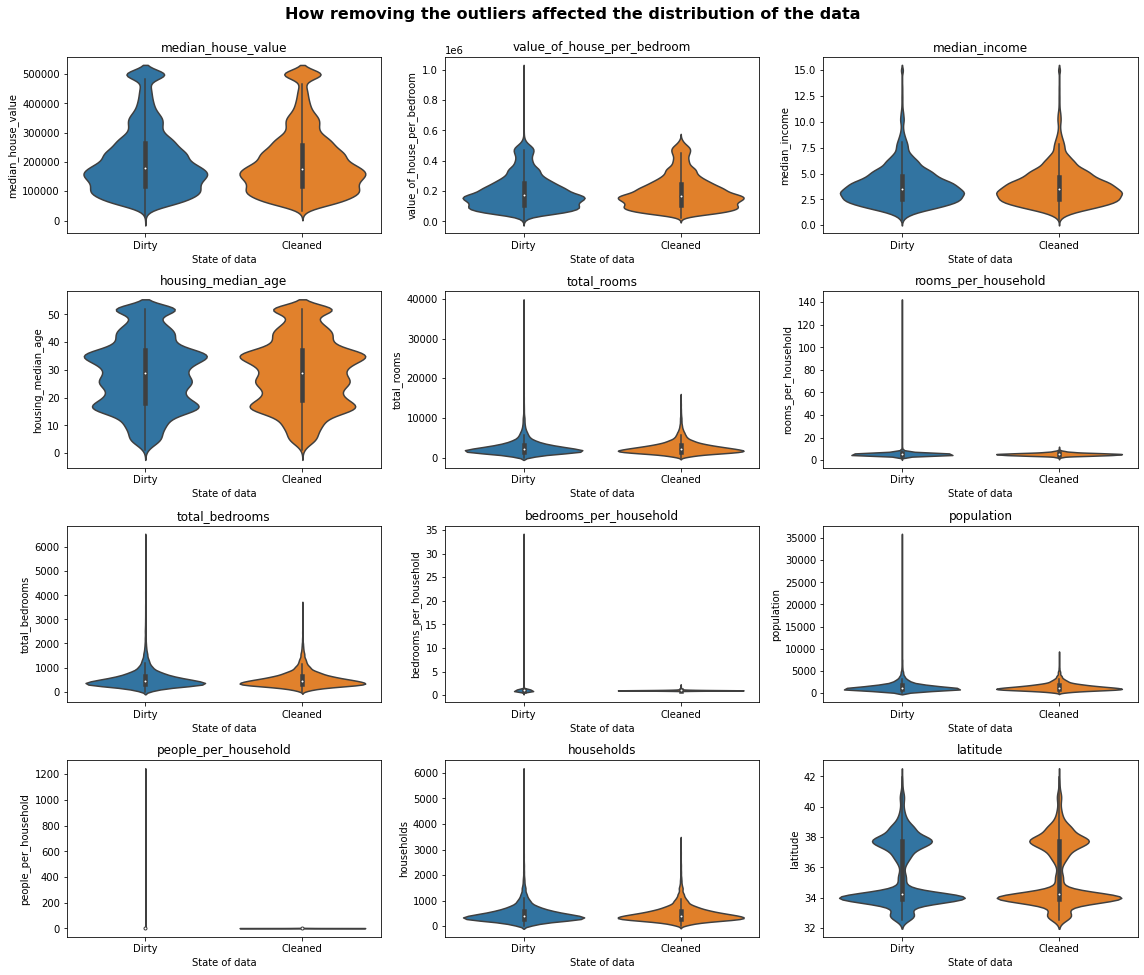

In [ ]:
import seaborn as sns

index = 1
fig = plt.figure(figsize = (16,16))
fig.suptitle('How removing the outliers affected the distribution of the data', fontsize=16, fontweight='bold', y=1.02)

for i in houses.columns[:len(houses.columns)-1]:
  plt.subplot(5,3, index)
  sns.violinplot(data=compare, x='State of data', y=compare[i])
  plt.title(i)
  index = index + 1
plt.tight_layout()
plt.show()

From the above visualisations, it appears that I haven't drastically changed the shape/trend of the data and have only chopped the ends off by removing the extreme outliers. 

Now that I have cleaned the data, I will now prepare the data to be fed into the various machine learning models. To do so, I will:
* Scale the data
* Split the data into samples and labels
* split the data into training and test sets

By doing this, not only do I make the data usuable for the models but I am also helping to improve the accuracy by scaling the data.

# Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_houses = scaler.fit_transform(houses_cleaned)
scaled_houses = pd.DataFrame(scaled_houses, columns=houses_cleaned.columns)
scaled_houses.head()

,median_house_value,value_of_house_per_bedroom,median_income,housing_median_age,total_rooms,rooms_per_household,total_bedrooms,bedrooms_per_household,population,people_per_household,households,latitude,longitude
0,2.219817,2.273035,2.420902,0.975921,-0.995824,1.446200,-1.154601,-0.383934,-1.186456,-0.504023,-1.155821,1.049343,-1.325348
1,1.383757,1.603940,2.408100,-0.636710,2.744543,0.822720,1.716191,-0.894767,1.095520,-1.107729,2.042056,1.039986,-1.320340
2,1.326894,1.230430,1.846566,1.862868,-0.642778,2.536057,-0.975360,0.104349,-0.995468,-0.169870,-0.994663,1.035307,-1.330356
3,1.230938,1.139515,0.978286,1.862868,-0.758856,0.471038,-0.843133,0.100543,-0.927415,-0.514331,-0.861945,1.035307,-1.335365
4,1.238935,1.125553,0.011791,1.862868,-0.546547,0.859257,-0.710906,0.179453,-0.919731,-1.010715,-0.735547,1.035307,-1.335365


# Split the data into samples and labels

In [ ]:
X_Features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
X = scaled_houses[X_Features]
Y = scaled_houses['median_house_value']

# Split the data into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(15380, 8) (15380,)
(3845, 8) (3845,)


# Models

I will use the following regression models to predict the median house value:


* Linear Regression
* Random Forest
* Support Vector Regression (SVR)
* Gradient Boosting Regression (GBR)

#First model




In [ ]:
from sklearn.linear_model import LinearRegression

linear_regrssion = LinearRegression() # instance of linear regression

linear_regrssion.fit(x_train, y_train) # train the model using our training data

LinearRegression()

## Test the Linear Regression model

In [ ]:
from sklearn.metrics import r2_score

linear_regression_train_predictions = linear_regrssion.predict(x_train)
train_acc = r2_score(y_train, linear_regression_train_predictions)

linear_regression_test_predictions = linear_regrssion.predict(x_test)
test_acc = r2_score(y_test, linear_regression_test_predictions)

print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")

Train acc: 66.49469572153038%
Test acc: 67.65297736042578%


## Any other metrics or hyperparameters that can be looked at?

In [ ]:
from sklearn.model_selection import GridSearchCV

# Find the best hypermaters for the SVR
number_of_folds = 5

parameters_to_tune = {'fit_intercept': ['True','False'],
                      'copy_X': ['True','False'],
                      'positive' : ['True', 'False']}

search = GridSearchCV(LinearRegression(), parameters_to_tune, cv = number_of_folds)
search.fit(x_train, y_train)

print(f"Best parameters set found: {search.best_params_}")

Best parameters set found: {'copy_X': 'True', 'fit_intercept': 'True', 'positive': 'True'}


From the GridSearch, the best parameters are: 
* copy_X = True
* fit_intercept = True
* positive = True

Lets see how the accuracy of the original Linear Regression model has improved as a result of using these new hyperparameters.

In [ ]:
# Use those best parameters in the model and observe the performance of the new model
linear_regression_2 = LinearRegression(fit_intercept = search.best_params_['fit_intercept'], copy_X = search.best_params_['copy_X'], positive = 'False')
linear_regression_2.fit(x_train, y_train)

linear_regression_train_predictions_2 = linear_regression_2.predict(x_train)
train_acc_2 = r2_score(y_train, linear_regression_train_predictions_2)

linear_regression_test_predictions_2 = linear_regression_2.predict(x_test)
test_acc_2 = r2_score(y_test, linear_regression_test_predictions_2)

print(f"Train acc: {train_acc_2 * 100}%")
print(f"Test acc: {test_acc_2 * 100}%")

Train acc: 54.776511871467484%
Test acc: 55.74463525117174%


In [ ]:
print('Training accuracy improvement of {:0.2f}%.'.format( 100 * (train_acc_2 - train_acc) / train_acc))
print('Test accuracy improvement of {:0.2f}%.'.format( 100 * (test_acc_2 - test_acc) / test_acc))

Training accuracy improvement of -17.62%.
Test accuracy improvement of -17.60%.


Here, it appears that the Linear Regression model works best with no hyperparameters.

Let's visualise the performance of the original model and the worse-performing tuned model.

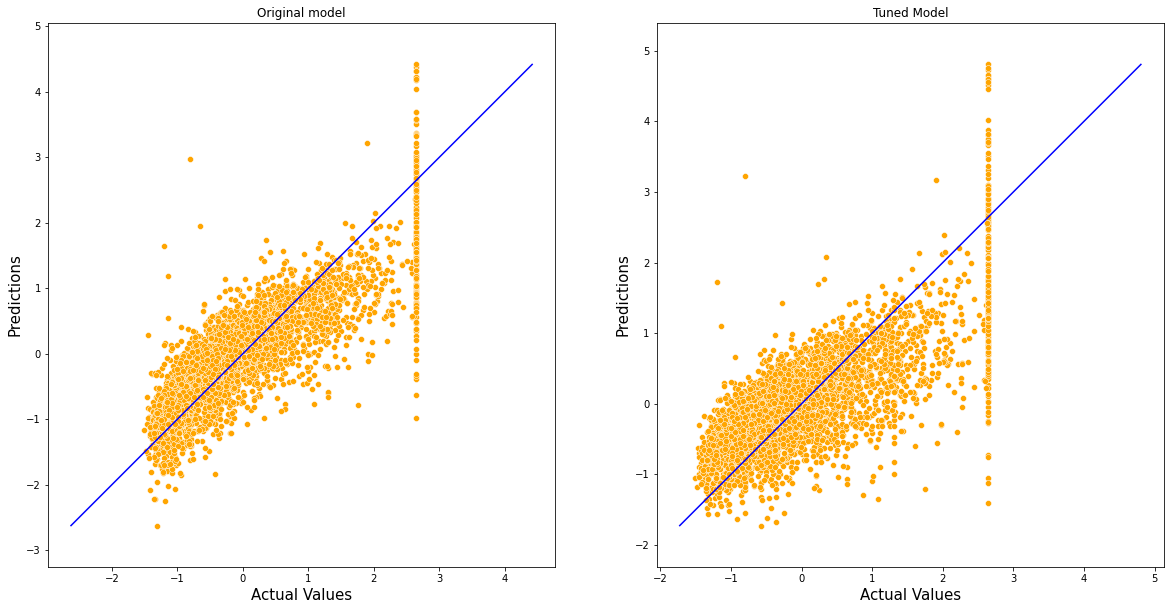

In [ ]:
# Predicted values vs Actual values
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=linear_regression_test_predictions, color='orange')

p1 = max(max(linear_regression_test_predictions), max(y_test))
p2 = min(min(linear_regression_test_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')

plt.title('Original model')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

# tuned model's predicted vs aactual values
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=linear_regression_test_predictions_2, color='orange')

p1 = max(max(linear_regression_test_predictions_2), max(y_test))
p2 = min(min(linear_regression_test_predictions_2), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')

plt.title('Tuned Model')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In the above plot, the linear blue line represents perfect accuracy where predicted value = actual value. The orange dots represent how well the model predicted each record. Generally, the closer the mass of orange dots are to the blue line, the better the performance of the model.

# Second model - Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=50, max_depth=50, random_state=10)
random_forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=50, n_estimators=50, random_state=10)

## Test the RandomForestRegressor model

In [ ]:
from sklearn.metrics import r2_score

random_forest_train_predictions = random_forest.predict(x_train)
train_acc = r2_score(y_train, random_forest_train_predictions)

random_forest_test_predictions = random_forest.predict(x_test)
test_acc = r2_score(y_test, random_forest_test_predictions)

print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")

Train acc: 97.55752514099937%
Test acc: 83.91113379191188%


## Any other metrics or hyperparameters that can be looked at?

In [ ]:
from sklearn.model_selection import GridSearchCV

random_state = 10
number_of_folds = 5

parameters_to_tune = [{'n_estimators': [10,50,100,500],
                      'max_depth': [5,10,20,50]}]

search = GridSearchCV(RandomForestRegressor(random_state=random_state), parameters_to_tune, cv = number_of_folds)
search.fit(x_train, y_train)

print(f"Best parameters set found: {search.best_params_}")

Best parameters set found: {'max_depth': 50, 'n_estimators': 500}


From the GridSearch, the best parameters are: 
* n_estimators = 500
* max_depth = 50

Lets see how the accuracy of the original Random Forest model has improved as a result of using these new hyperparameters.

In [ ]:
random_forest = RandomForestRegressor(n_estimators = search.best_params_['n_estimators'],
                                       max_depth = search.best_params_['max_depth'],
                                       random_state=10)
random_forest.fit(x_train, y_train)

random_forest_train_predictions_2 = random_forest.predict(x_train)
train_acc_2 = r2_score(y_train, random_forest_train_predictions_2)

random_forest_test_predictions_2 = random_forest.predict(x_test)
test_acc_2 = r2_score(y_test, random_forest_test_predictions_2)

print(f"Train acc: {train_acc_2 * 100}%")
print(f"Test acc: {test_acc_2 * 100}%")

Train acc: 97.75865087700521%
Test acc: 84.25764561273452%


In [ ]:
print('Training accuracy improvement of {:0.2f}%.'.format( 100 * (train_acc_2 - train_acc) / train_acc))
print('Test accuracy improvement of {:0.2f}%.'.format( 100 * (test_acc_2 - test_acc) / test_acc))

Training accuracy improvement of 0.21%.
Test accuracy improvement of 0.41%.


Here, it appears that the Random Forest model has improved marginally as a result of using the new hyperparameters.

Let's visualise the performance of the original model and the tuned model.

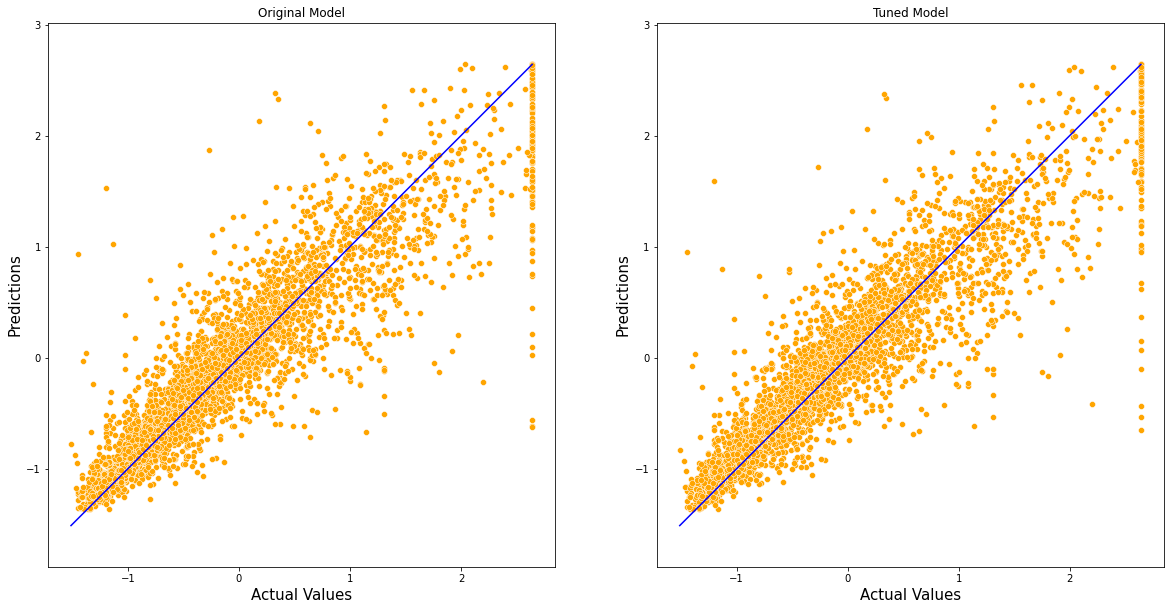

In [ ]:
# Predicted values vs Actual values
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=random_forest_test_predictions, color='orange')

p1 = max(max(random_forest_test_predictions), max(y_test))
p2 = min(min(random_forest_test_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')

plt.title('Original Model')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

# tuned model's predicted vs aactual values
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=random_forest_test_predictions_2, color='orange')

p1 = max(max(random_forest_test_predictions_2), max(y_test))
p2 = min(min(random_forest_test_predictions_2), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')

plt.title('Tuned Model')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In the above plot, the linear blue line represents perfect accuracy where predicted value = actual value. The orange dots represent how well the model predicted each record. Generally, the closer the mass of orange dots are to the blue line, the better the performance of the model.

#Third model - SVR

In [ ]:
# SVR Model 
from sklearn.svm import SVR

svr = SVR(C=10, kernel='poly')
svr.fit(x_train, y_train)

SVR(C=10, kernel='poly')

## Test the SVR model

In [ ]:
from sklearn.metrics import r2_score

svr_train_predictions = svr.predict(x_train)
train_acc = r2_score(y_train, svr_train_predictions)

svr_test_predictions = svr.predict(x_test)
test_acc = r2_score(y_test, svr_test_predictions)

print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")

Train acc: 53.8834915263515%
Test acc: 55.68045933509171%


## Any other metrics or hyperparameters that can be looked at?

Perform K-fold validation to find best hyper-parameters.


I used HalvingGridSearchCV instead of GridSearchCV to reduce the computational resources and the runtime required to run the hyper-parameter-optimising code below. I had to do so for the SVR and GBR models as these models are computationally expensive and thus scale badly with a large number of samples.

HalvingGridSearch is a  search strategy that starts evaluating all the possible candidates with a small amount of resources and iteratively selects the best candidates, using more and more resources. In General, the Halving GridSearch performs 11x times faster than the regular GridSearch.

Note: If I had access to more computational power, I would have used the more exhaustive GridSearch method.

HalvingGridSearchCV for the SVR model

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# Find the best hypermaters for the SVR
number_of_folds = 5

parameters_to_tune = {'C': [1,10,50,100,200],
                      'kernel': ['linear','poly','rbf']}

search = HalvingGridSearchCV(SVR(), parameters_to_tune, cv = number_of_folds)
search.fit(x_train, y_train)

print(f"Best parameters set found: {search.best_params_}")

Best parameters set found: {'C': 50, 'kernel': 'rbf'}


From the HalvingGridSearch, the best parameters are: 
* C = 10
* kernel = 'rbf'

Lets see how the accuracy of the original SVR model has improved as a result of using these new hyperparameters.

In [ ]:
# Use those best parameters in the model and observe the performance of the new model
svr = SVR(C = search.best_params_['C'], kernel = search.best_params_['kernel'])
svr.fit(x_train, y_train)

svr_train_predictions_2 = svr.predict(x_train)
train_acc_2 = r2_score(y_train, svr_train_predictions_2)

svr_test_predictions_2 = svr.predict(x_test)
test_acc_2 = r2_score(y_test, svr_test_predictions_2)

print(f"Train acc: {train_acc_2 * 100}%")
print(f"Test acc: {test_acc_2 * 100}%")

Train acc: 81.8796468263405%
Test acc: 80.70701919840961%


In [ ]:
print('Training accuracy improvement of {:0.2f}%.'.format( 100 * (train_acc_2 - train_acc) / train_acc))
print('Test accuracy improvement of {:0.2f}%.'.format( 100 * (test_acc_2 - test_acc) / test_acc))

Training accuracy improvement of 51.96%.
Test accuracy improvement of 44.95%.


Here, it appears that the SVR model has improved significantly as a result of using the new hyperparameters.

Let's visualise the performance of the original model and the tuned model.

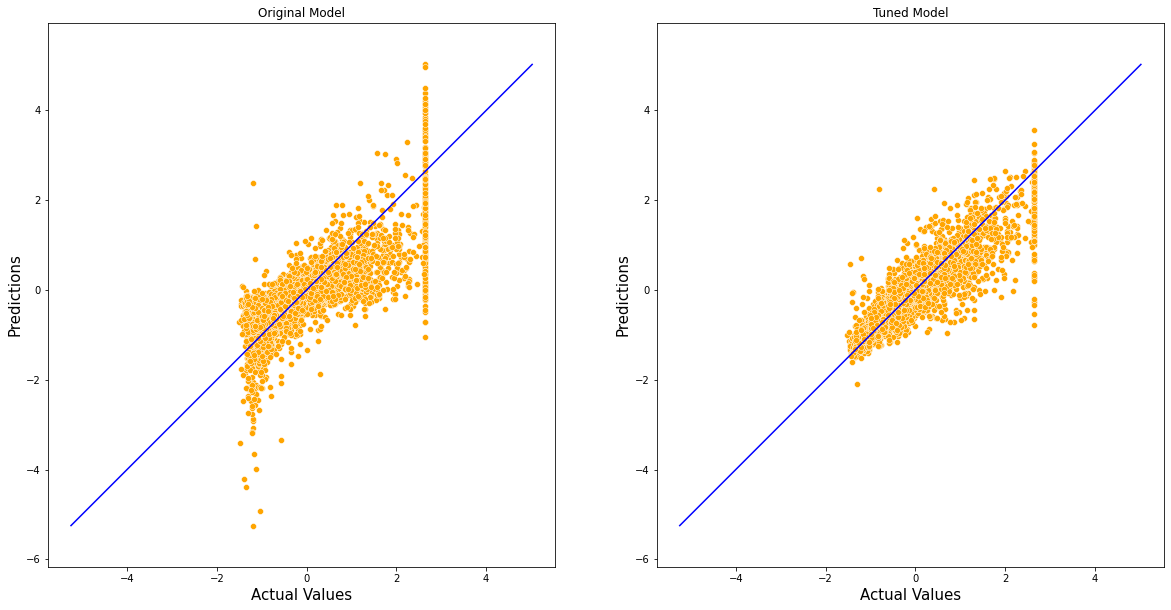

In [ ]:
# Predicted values vs Actual values
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=svr_test_predictions, color='orange')

p1 = max(max(svr_test_predictions), max(y_test))
p2 = min(min(svr_test_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')

plt.title('Original Model')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

# tuned model's predicted vs aactual values
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=svr_test_predictions_2, color='orange')

p1 = max(max(svr_test_predictions), max(y_test))
p2 = min(min(svr_test_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')

plt.title('Tuned Model')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In the above plot, the linear blue line represents perfect accuracy where predicted value = actual value. The orange dots represent how well the model predicted each record. Generally, the closer the mass of orange dots are to the blue line, the better the performance of the model.

# Fourth Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1,
                                max_depth=5, random_state=10,loss='squared_error')
gradient_boosting_regressor.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=50, random_state=10)

## Test the fourth model

In [ ]:
gbr_train_predictions = gradient_boosting_regressor.predict(x_train)
train_acc = r2_score(y_train, gbr_train_predictions)

gbr_test_predictions = gradient_boosting_regressor.predict(x_test)
test_acc = r2_score(y_test, gbr_test_predictions)

print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")

Train acc: 83.26132279766453%
Test acc: 81.74794077820079%


## Any other metrics or hyperparameters that can be looked at?

Perform K-fold validation to find best hyper-parameters.


I used HalvingGridSearchCV instead of GridSearchCV to reduce the computational resources and the runtime required to run the hyper-parameter-optimising code below. I had to do so for the SVR and GBR models as these models are computationally expensive and thus scale badly with a large number of samples.

HalvingGridSearch is a  search strategy that starts evaluating all the possible candidates with a small amount of resources and iteratively selects the best candidates, using more and more resources. In General, the Halving GridSearch performs 11x times faster than the regular GridSearch.

Note: If I had access to more computational power, I would have used the more exhaustive GridSearch method.

Halving Grid Search for the Gradient Boosting Regressor model

In [ ]:
random_state = 10
number_of_folds = 5

parameters_to_tune = [{'n_estimators': [10,50,100],
                       'learning_rate': [0.01,0.1,0.5],
                      'max_depth': [5,10,20],
                       'loss': ['squared_error', 'absolute_error', 'huber', 'quantile']}]

search = HalvingGridSearchCV(GradientBoostingRegressor(random_state=random_state), parameters_to_tune, cv = number_of_folds)
search.fit(x_train, y_train)
 
print(f"Best parameters set found: {search.best_params_}")

Best parameters set found: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 5, 'n_estimators': 100}


From the HalvingGridSearch, the best parameters are: 
  * learning_rate = 0.1
  * loss = huber
  * max_depth = 10
  * n_estimators = 100

Lets see how the accuracy of the original Gradient Boosting Regressor model has improved as a result of using these new hyperparameters.

In [ ]:
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators = search.best_params_['n_estimators'],
                                       learning_rate = search.best_params_['learning_rate'],
                                       max_depth = search.best_params_['max_depth'],
                                       loss = search.best_params_['loss'],
                                       random_state=10)
gradient_boosting_regressor.fit(x_train, y_train)

gbr_train_predictions_2 = gradient_boosting_regressor.predict(x_train)
train_acc_2 = r2_score(y_train, gbr_train_predictions_2)

gbr_test_predictions_2 = gradient_boosting_regressor.predict(x_test)
test_acc_2 = r2_score(y_test, gbr_test_predictions_2)

print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")

Train acc: 83.26132279766453%
Test acc: 81.74794077820079%


In [ ]:
print('Training accuracy improvement of {:0.2f}%.'.format( 100 * (train_acc_2 - train_acc) / train_acc))
print('Test accuracy improvement of {:0.2f}%.'.format( 100 * (test_acc_2 - test_acc) / test_acc))

Training accuracy improvement of 4.87%.
Test accuracy improvement of 2.53%.


Here, it appears that the Gradient Boosting Regressor model has improved marginally as a result of using the new hyperparameters.

Let's visualise the performance of the original model and the tuned model.

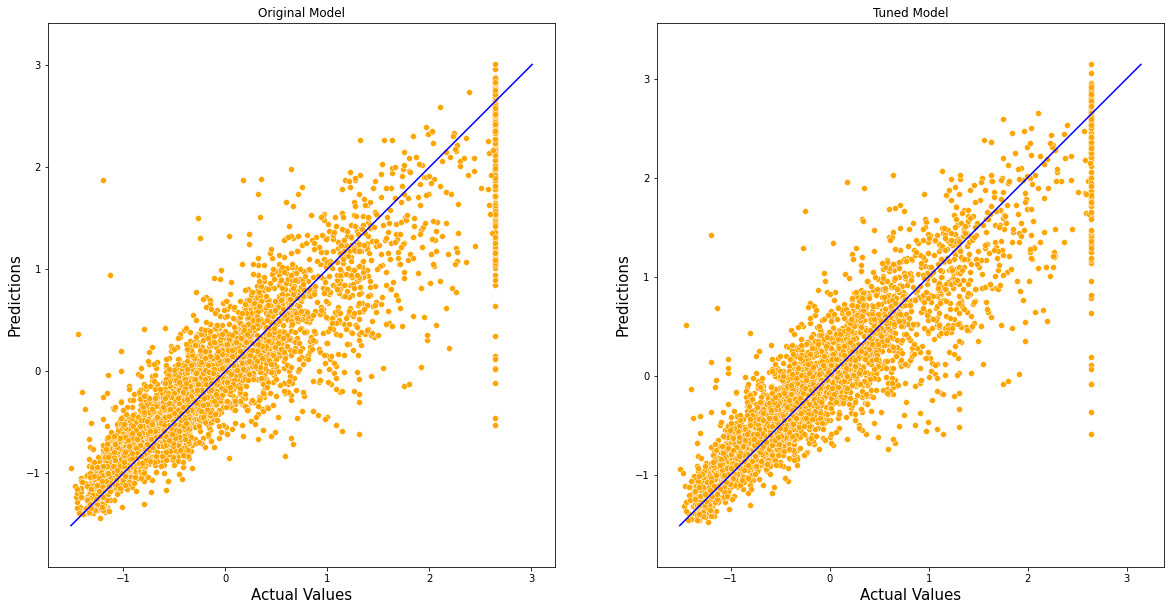

In [ ]:
# Predicted values vs Actual values
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=gbr_test_predictions, color='orange')

p1 = max(max(gbr_test_predictions), max(y_test))
p2 = min(min(gbr_test_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')

plt.title('Original Model')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

# tuned model's predicted vs aactual values
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=gbr_test_predictions_2, color='orange')

p1 = max(max(gbr_test_predictions_2), max(y_test))
p2 = min(min(gbr_test_predictions_2), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')

plt.title('Tuned Model')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In the above plot, the linear blue line represents perfect accuracy where predicted value = actual value. The orange dots represent how well the model predicted each record. Generally, the closer the mass of orange dots are to the blue line, the better the performance of the model.

# Conclusion
---

**Best Results (R2 metric):**
* Linear Regression
  * Training Accuracy = 66.49%
  * Test Accuracy = 67.65%

* Random Forest
  * Training Accuracy = 97.76%
  * Test Accuracy = 84.26%

* Support Vector Regressor
  * Training Accuracy = 81.88%
  * Test Accuracy = 80.71%

* Gradient Boosting Regressor
  * Training Accuracy = 83.26%
  * Test Accuracy = 81.75%

---

**Improvement in performance**

* Linear Regression
  * Training Accuracy improved by 0%
  * Test Accuracy improved by 0%

* Random Forest
  * Training Accuracy improved by 0.21%
  * Test Accuracy improved by 0.41%

* Support Vector Regressor
  * Training Accuracy improved by 51.96%
  * Test Accuracy improved by 44.95%

* Gradient Boosting Regressor
  * Training Accuracy improved by 4.87%
  * Test Accuracy improved by 2.53%

---
**Submission Report**

**The process**

The aim of this assignment was to produce four different machine learning models to predict the median house value in a given region, with a particular focus on what improvements we could make to the machine learning models. To make my machine learning models perform as best as possible, I focused firstly on data preparation by checking for missing or null values by using the isnull() function. I then identifying and removing any outliers by manually locating all records containing values that did not make sense in the real world before applying KNN anomaly detection to the remaining dataset.

For the models to perform better, I scaled the data to help improve learning. Finally, after trialling a first attempt for each model, I then used GridSeacrhCV (or Halving Gridsearch depending on the computational cost of the model used) to find the best hyperparameters. I then fed these hyperparameters back into the model and calculated the accuracy of the tuned model.

To summarise, I used the following methods throughout this assignment to improve the performance of the various machine learning models I created:

* Handled (checked for) missing or null values
* Removed outliers
* Feature selection and scaling
* Hyperparameter tuning


**The results**

The result here are rather interesting. Overall, the Random Forest model performs the best with a test accuracy of 84.26% however, it appears to be overfitting due to the 13.50% difference between training accuracy and test accuracy. In this regard, the Gradient Boosting Regressor and the Support Vector Regressor also perform to a similar but slightly worse standard but do not seem to suffer from overfitting. It is therefore unclear as to which model we should choose.

What is clear, however is that Linear Regression performed poorly and due to the nature of this model, it is incredibly difficult to improve the performance of the model using hyperparamter tuning. This is because there are only a handful of hyperparameters available with this model, all of which have an insignificant impact on the performance of the model.

One particularly noteworthy model is the Support Vector Regressor model which improved vastly compared to the other three models, improving its training accuracy improved by 51.96% and its test accuracy by 44.95%. This shows how sensitive the SVR model is to its hyperparameters in comparison to the other models. 

---
